In [19]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('umkm_jabar.csv')

In [21]:
df.dtypes
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1350 non-null   int64 
 1   kode_provinsi        1350 non-null   int64 
 2   nama_provinsi        1350 non-null   object
 3   kode_kabupaten_kota  1350 non-null   int64 
 4   nama_kabupaten_kota  1350 non-null   object
 5   kategori_usaha       1350 non-null   object
 6   jumlah_umkm          1350 non-null   int64 
 7   satuan               1350 non-null   object
 8   tahun                1350 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 95.1+ KB


Index(['id', 'kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota',
       'nama_kabupaten_kota', 'kategori_usaha', 'jumlah_umkm', 'satuan',
       'tahun'],
      dtype='object')

Pertanyaan-pertanyaan untuk menggali informasi dan insight dari dataset UMKM Jabar:
1. Berapa jumlah total UMKM di setiap kabupaten/kota di Jawa Barat tiap tahun?

In [22]:
df_new = pd.DataFrame(df.groupby(by=['tahun','nama_kabupaten_kota'])['jumlah_umkm'].sum().reset_index(name='Total'))
display(df_new)

df_pivot_new = pd.pivot_table(df_new,values=['Total'],index=['nama_kabupaten_kota'],columns=['tahun'],aggfunc=np.sum)


df_pivot_new.columns = df_pivot_new.columns.get_level_values('tahun')
df_pivot_new.columns.name = None
df_pivot_new = pd.DataFrame(df_pivot_new.reset_index())


df_kabkot = pd.DataFrame(df.groupby(by=['nama_kabupaten_kota'])['jumlah_umkm'].sum().reset_index(name='Total'))
df_kabkot.sort_values(by='Total', ascending=False, axis=0, inplace=True)

df_pivot_new['Total'] = df_kabkot['Total']
df_pivot_new.sort_values(by='Total', ascending=True, axis=0, inplace=True)
df_pivot_new

,tahun,nama_kabupaten_kota,Total
0,2017,KABUPATEN BANDUNG,375133
1,2017,KABUPATEN BANDUNG BARAT,165957
2,2017,KABUPATEN BEKASI,245337
3,2017,KABUPATEN BOGOR,398254
4,2017,KABUPATEN CIAMIS,148363
...,...,...,...
130,2021,KOTA CIMAHI,76835
131,2021,KOTA CIREBON,54305
132,2021,KOTA DEPOK,219237
133,2021,KOTA SUKABUMI,53980


/var/folders/rh/454377xn11sbbfl82427zkyc0000gn/T/ipykernel_48419/3367961495.py:6: FutureWarning: The provided callable <function sum at 0x10b87f420> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_pivot_new = pd.pivot_table(df_new,values=['Total'],index=['nama_kabupaten_kota'],columns=['tahun'],aggfunc=np.sum)


,nama_kabupaten_kota,2017,2018,2019,2020,2021,Total
19,KOTA BANJAR,27498,29201,31005,32926,34961,155591
25,KOTA SUKABUMI,42456,45082,47871,50833,53980,240222
23,KOTA CIREBON,42712,45356,48161,51142,54305,241676
22,KOTA CIMAHI,60431,64170,68141,72354,76835,341931
12,KABUPATEN PANGANDARAN,64023,67985,72191,76656,81399,362254
21,KOTA BOGOR,91753,97429,103456,109860,116656,519154
13,KABUPATEN PURWAKARTA,92645,98376,104463,110926,117789,524199
26,KOTA TASIKMALAYA,96751,102734,109093,115844,123011,547433
10,KABUPATEN KUNINGAN,100758,106990,113608,120639,128103,570098
16,KABUPATEN SUMEDANG,123393,131029,139135,147742,156883,698182


Export ke excel

In [23]:
path = r'/Users/user/Documents/My Course/ITbox/Project/umkm_perKotaKab.xlsx'
writer = pd.ExcelWriter(path,engine = 'xlsxwriter')
df_pivot_new.to_excel(writer, sheet_name = 'sheet 1')
writer.book.close()
writer.close()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xlsxwriter/workbook.py:368: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


Visualisasi Data

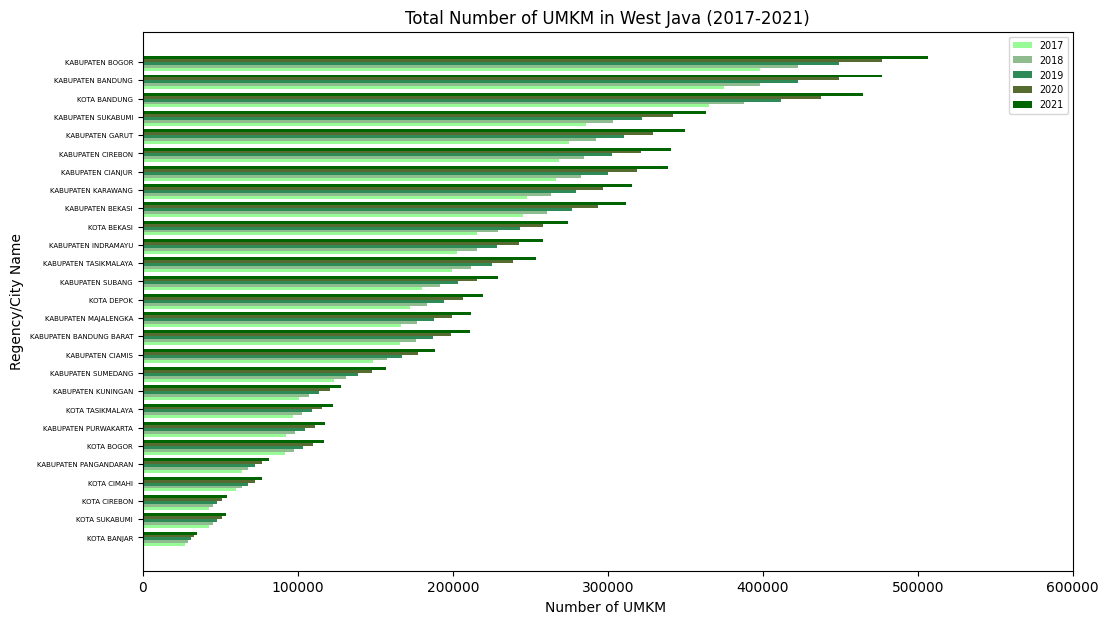

In [25]:
import matplotlib.pyplot as plt
import numpy as np


labels = list(df_pivot_new['nama_kabupaten_kota'])
data = {
    '2017': list(df_pivot_new.iloc[:, 1]),
    '2018': list(df_pivot_new.iloc[:, 2]),
    '2019': list(df_pivot_new.iloc[:, 3]),
    '2020': list(df_pivot_new.iloc[:, 4]),
    '2021': list(df_pivot_new.iloc[:, 5]),
}

y = np.arange(len(labels))  # Label posisi y
height = 0.16  # Tinggi bar

colors = ['#98FB98', '#8FBC8F', '#2E8B57', '#556B2F', '#006400']

# Membuat vertical bar chart
fig, ax = plt.subplots(figsize=(12, 7))
for i, (category, values) in enumerate(data.items()):
    bars = ax.barh(y + (i - len(data) / 2) * height, values, height, label=category, color=colors[i % len(colors)])

# Menambahkan label, judul, dan legend
ax.set_ylabel('Regency/City Name')
ax.set_xlabel('Number of UMKM ')
ax.set_title('Total Number of UMKM in West Java (2017-2021)')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend(fontsize='x-small', loc='upper right', ncol=1)

plt.xlim(right=600000)
plt.ticklabel_format(style='plain', axis='x')
plt.yticks(rotation=0)
plt.yticks(fontsize=5)
plt.savefig('distribusi_umkm_jabar.jpg', dpi=300, bbox_inches='tight')
plt.show()


2. Bagaimana distribusi kategori usaha UMKM di Jawa Barat?
Insight: Mengetahui sektor usaha yang paling dominan di Jabar sepanjang 2017 hingga 2021

In [26]:
df_catTop3 = pd.DataFrame(df.groupby(by=['kategori_usaha'])['jumlah_umkm'].sum().reset_index(name='Total'))
df_catTop3.sort_values(by='Total', ascending=False, axis=0, inplace=True)
display(df_catTop3.head(3))

,kategori_usaha,Total
7,KULINER,9964632
8,MAKANAN,7288259
5,JASA/LAINNYA,3148674


3. Berdasarkan kategori usaha yang paling banyak dalam hal ini kuliner, tampilkan distribusi kat kuliner di Jabar
Insight: Mengetahui jumlah umkm dengan kategori kuliner di setiap kota/kabupaten di Jabar sepanjang 2017 hingga 2021

In [27]:
cond1 = df['kategori_usaha']=='KULINER'
df_catKuliner = pd.DataFrame(df[cond1].groupby(by=['nama_kabupaten_kota'])['jumlah_umkm'].sum().reset_index(name='Total'))
df_catKuliner.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_catKuliner

,nama_kabupaten_kota,Total
3,KABUPATEN BOGOR,806338
0,KABUPATEN BANDUNG,759530
18,KOTA BANDUNG,739453
15,KABUPATEN SUKABUMI,578343
7,KABUPATEN GARUT,557142
6,KABUPATEN CIREBON,543087
5,KABUPATEN CIANJUR,539226
9,KABUPATEN KARAWANG,502243
2,KABUPATEN BEKASI,496730
20,KOTA BEKASI,436561


Visualisasi Data

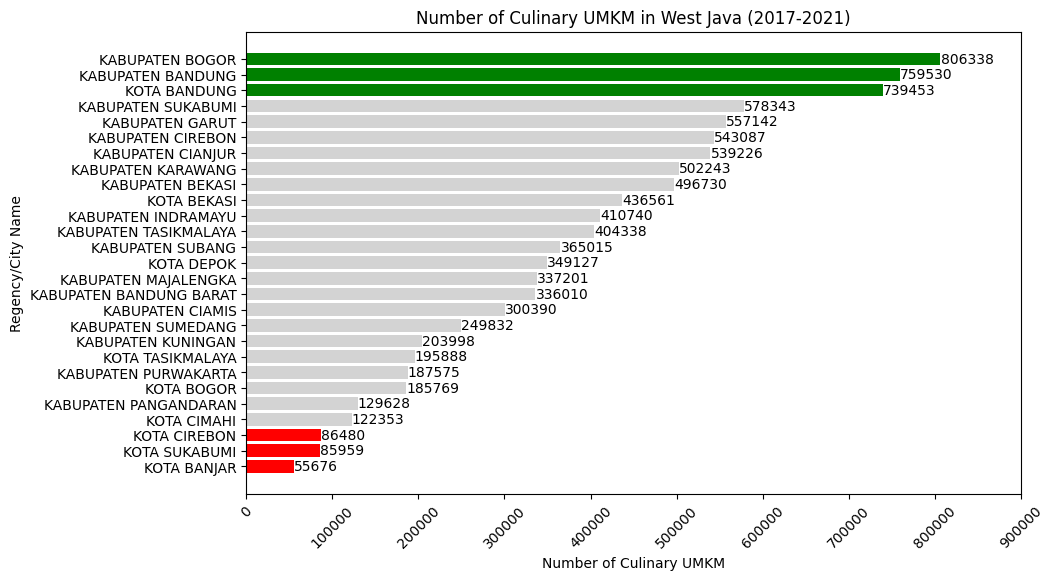

In [28]:
df_catKuliner.sort_values(by='Total', ascending=True, axis=0, inplace=True)

plt.figure(figsize=(10, 6))  # Menetapkan ukuran chart

# Menghitung batas untuk 3 data teratas dan 3 data terbawah
top_3 = df_catKuliner['Total'].nlargest(3).index
bottom_3 = df_catKuliner['Total'].nsmallest(3).index

# Mengatur warna berdasarkan posisi data
colors = ['green' if i in top_3 else 'red' if i in bottom_3 else 'lightgrey' for i in df_catKuliner.index]
bars = plt.barh(df_catKuliner['nama_kabupaten_kota'], df_catKuliner['Total'], color=colors)

# Penamaan label sumbu x dan y, serta judul chart
plt.xlabel('Number of Culinary UMKM')
plt.ylabel('Regency/City Name')
plt.xticks(rotation=45)
plt.xlim(right=900000)
plt.title('Number of Culinary UMKM in West Java (2017-2021)')


for bar, qty in zip(bars, df_catKuliner['Total']):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, str(qty), ha='left', va='center', fontsize=10)
plt.savefig('distribusi_umkm_Kuliner_jabar.jpg', dpi=300, bbox_inches='tight')
plt.show()

4. Bagaimana tren jumlah UMKM dari tahun ke tahun di Jawa Barat?
Insight: Melihat pertumbuhan atau penurunan jumlah UMKM dari waktu ke waktu.

In [36]:
df_Tren = pd.DataFrame(df.groupby(by=['tahun'])['jumlah_umkm'].sum().reset_index(name='Jumlah_UMKM'))
df_Tren.sort_values(by='Jumlah_UMKM', ascending=True, axis=0, inplace=True)
df_Tren.rename(columns={'Jumlah_UMKM':'Number_of_UMKM'}, inplace=True)
df_Tren

,tahun,Number_of_UMKM
0,2017,4921572
1,2018,5226081
2,2019,5549426
3,2020,5892787
4,2021,6257378


Visualisasi Data

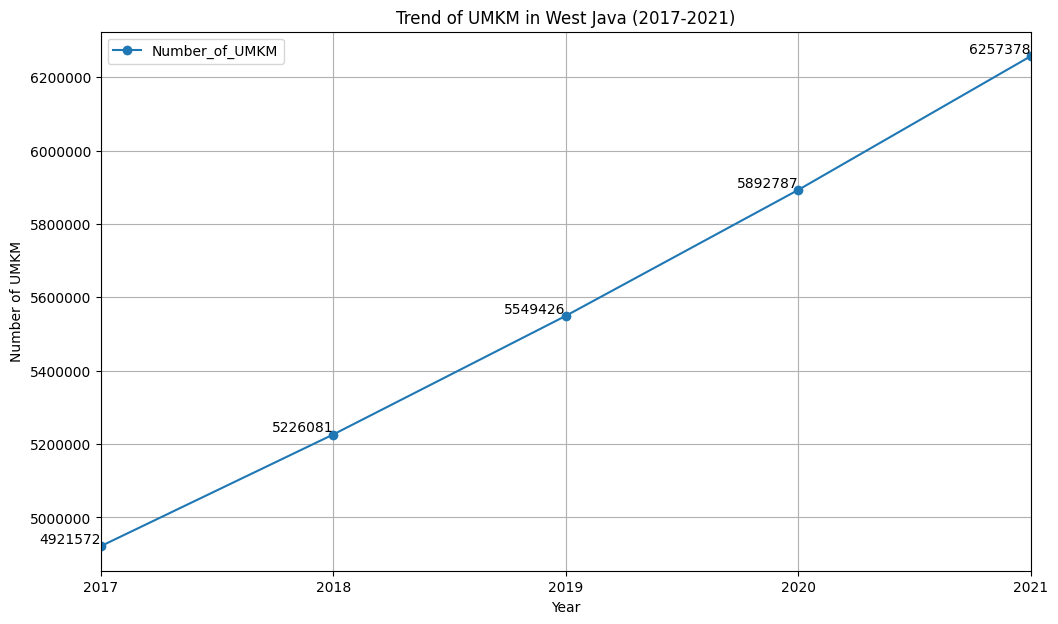

In [38]:
# Konversi kolom 'tahun' menjadi tipe datetime
df_Tren['tahun'] = pd.to_datetime(df_Tren['tahun'], format='%Y')

# Plot grafik dengan sumbu x diskrit
df_Tren.plot(x='tahun',
             y=['Number_of_UMKM'],
             kind='line',
             grid=True,
             xlabel='Year',
             ylabel='Number of UMKM',
             figsize=(12, 7),
             rot=0,
             title='Trend of UMKM in West Java (2017-2021)',
             table=False,
             secondary_y=False,
             marker='o')

# Menambahkan label nilai di atas setiap marker
for i, j in zip(df_Tren['tahun'], df_Tren['Number_of_UMKM']):
    plt.text(i, j, str(j), ha='right', va='bottom', fontsize=10)

plt.ticklabel_format(style='plain', axis='y')  # Mengatur sumbu y tanpa notasi ilmiah
plt.savefig('tren_umkm_jabar.jpg', dpi=300, bbox_inches='tight')
plt.show()

5. Bagaimana tren UMK semua kategori usaha dari tahun ke tahun di Jawa Barat?
Insight: Melihat pertumbuhan atau penurunan dari waktu ke waktu.

In [39]:
df_caTren = pd.DataFrame(df.groupby(by=['kategori_usaha','tahun'])['jumlah_umkm'].sum().reset_index(name='Total'))
df_caTren.sort_values(by='tahun', ascending=True, axis=0, inplace=True)
display(df_caTren)

df_pivot = pd.pivot_table(df_caTren,values=['Total'],index=['tahun'],columns=['kategori_usaha'],aggfunc=np.sum)
#df_pivot.index.name = None
df_pivot.columns.name = None

# Meratakan multi-level index kolom
df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]

# Reset index
df_pivot = df_pivot.reset_index()


df_pivot

,kategori_usaha,tahun,Total
0,AKSESORIS,2017,11456
35,KULINER,2017,1761097
30,KONVEKSI,2017,243868
25,JASA/LAINNYA,2017,556477
15,CRAFT,2017,409176
45,MINUMAN,2017,238960
10,BORDIR,2017,1635
20,FASHION,2017,399358
40,MAKANAN,2017,1288089
5,BATIK,2017,11456


/var/folders/rh/454377xn11sbbfl82427zkyc0000gn/T/ipykernel_48419/3695022814.py:5: FutureWarning: The provided callable <function sum at 0x10b87f420> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_pivot = pd.pivot_table(df_caTren,values=['Total'],index=['tahun'],columns=['kategori_usaha'],aggfunc=np.sum)


,tahun,Total_AKSESORIS,Total_BATIK,Total_BORDIR,Total_CRAFT,Total_FASHION,Total_JASA/LAINNYA,Total_KONVEKSI,Total_KULINER,Total_MAKANAN,Total_MINUMAN
0,2017,11456,11456,1635,409176,399358,556477,243868,1761097,1288089,238960
1,2018,12164,12164,1741,434494,424065,590909,258959,1870058,1367784,253743
2,2019,12917,12917,1846,461376,450301,627474,274978,1985763,1452412,269442
3,2020,13718,13718,1962,489922,478164,666295,291993,2108625,1542275,286115
4,2021,14563,14563,2081,520235,507749,707519,310060,2239089,1637699,303820


In [40]:
import matplotlib.pyplot as plt

6. Bagaimana tren UMK semua kategori usaha dari tahun ke tahun di Jawa Barat?
Insight: Melihat pertumbuhan atau penurunan dari waktu ke waktu.



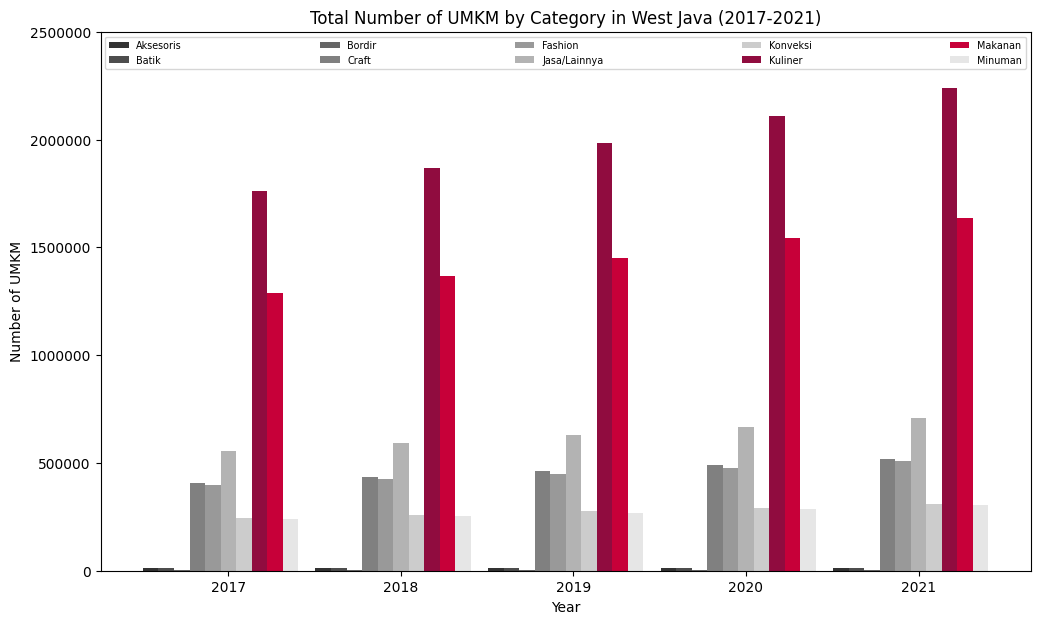

In [42]:
labels = list(df_pivot['tahun'])
data = {
    'Aksesoris': list(df_pivot['Total_AKSESORIS']),
    'Batik': list(df_pivot['Total_BATIK']),
    'Bordir': list(df_pivot['Total_BORDIR']),
    'Craft': list(df_pivot['Total_CRAFT']),
    'Fashion': list(df_pivot['Total_FASHION']),
    'Jasa/Lainnya': list(df_pivot['Total_JASA/LAINNYA']),
    'Konveksi': list(df_pivot['Total_KONVEKSI']),
    'Kuliner': list(df_pivot['Total_KULINER']),
    'Makanan': list(df_pivot['Total_MAKANAN']),
    'Minuman': list(df_pivot['Total_MINUMAN'])
}

x = np.arange(len(labels))  # Label posisi x
width = 0.09  # Lebar bar

colors = ['#333333', '#4d4d4d', '#666666', '#808080', '#999999', '#b3b3b3', '#cccccc','#900C3F', '#C70039', '#e6e6e6']

# Membuat bar chart
fig, ax = plt.subplots(figsize=(12, 7))
for i, (category, values) in enumerate(data.items()):
    bars = ax.bar(x + (i - len(data) / 2) * width, values, width, label=category, color=colors[i % len(colors)])

# Menambahkan label, judul, dan legend
ax.set_xlabel('Year')
ax.set_ylabel('Number of UMKM')
ax.set_title('Total Number of UMKM by Category in West Java (2017-2021)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize='x-small', loc='upper center', ncol=5, mode='expand')

plt.ylim(top=2500000)
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('Jumlah_umkm_per_kategori_usaha.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [43]:
df_kabkot = pd.DataFrame(df.groupby(by=['nama_kabupaten_kota'])['jumlah_umkm'].sum().reset_index(name='Total'))
df_kabkot.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_kabkot

,nama_kabupaten_kota,Total
3,KABUPATEN BOGOR,2253395
0,KABUPATEN BANDUNG,2122590
18,KOTA BANDUNG,2066482
15,KABUPATEN SUKABUMI,1616240
7,KABUPATEN GARUT,1556992
6,KABUPATEN CIREBON,1517721
5,KABUPATEN CIANJUR,1506928
9,KABUPATEN KARAWANG,1403572
2,KABUPATEN BEKASI,1388165
20,KOTA BEKASI,1220018


In [44]:
# Mendapat data koordinat Kab/kota Jawa Barat

cord_nas = pd.read_csv('daftar-nama-daerah.csv')
cord_nas.head()
cond1 = cord_nas['parent_nid'] == 12
cord_jabar = cord_nas[cond1][['name','latitude','longitude']]
cord_jabar['name'] = cord_jabar['name'].str.upper()

cord_jabar.rename(columns={'name': 'nama_kabupaten_kota'}, inplace=True)

new_data = pd.DataFrame({'nama_kabupaten_kota':['KABUPATEN PANGANDARAN'],'latitude': [-7.701655],'longitude':[108.494220]})
cord_jabar = cord_jabar._append(new_data, ignore_index=True)

cord_jabar

,nama_kabupaten_kota,latitude,longitude
0,KABUPATEN BOGOR,-6.600000,106.800000
1,KABUPATEN SUKABUMI,-6.924050,106.922203
2,KABUPATEN CIANJUR,-6.817253,107.130729
3,KABUPATEN BANDUNG,-6.914744,107.609811
4,KABUPATEN GARUT,-7.227906,107.908699
5,KABUPATEN TASIKMALAYA,-7.327954,108.214104
6,KABUPATEN CIAMIS,-7.333333,108.350000
7,KABUPATEN KUNINGAN,-6.983333,108.483333
8,KABUPATEN CIREBON,-6.715534,108.564003
9,KABUPATEN MAJALENGKA,-6.853103,108.225890


In [45]:
df_data = pd.merge(df_kabkot, cord_jabar, on='nama_kabupaten_kota', how='left')

# Menentukan urutan baru kolom
new_column_order = ['nama_kabupaten_kota', 'Total', 'latitude', 'longitude']

# Memindahkan posisi kolom
df_data = df_data.reindex(columns=new_column_order)
df_data

,nama_kabupaten_kota,Total,latitude,longitude
0,KABUPATEN BOGOR,2253395,-6.600000,106.800000
1,KABUPATEN BANDUNG,2122590,-6.914744,107.609811
2,KOTA BANDUNG,2066482,-6.914744,107.609811
3,KABUPATEN SUKABUMI,1616240,-6.924050,106.922203
4,KABUPATEN GARUT,1556992,-7.227906,107.908699
5,KABUPATEN CIREBON,1517721,-6.715534,108.564003
6,KABUPATEN CIANJUR,1506928,-6.817253,107.130729
7,KABUPATEN KARAWANG,1403572,-6.322730,107.337579
8,KABUPATEN BEKASI,1388165,-6.233333,107.000000
9,KOTA BEKASI,1220018,-6.233333,107.000000


In [46]:
import folium
# Buat peta Jawa Barat
map_jawabarat = folium.Map(location=[-6.920432, 107.602707], zoom_start=9)

# Tambahkan marka berdasarkan jumlah UMKM di setiap kota dengan transparansi
for index, row in df_data.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']], radius=row['Total']/80000, color='blue', fill=True, fill_color='blue', fill_opacity=0.5).add_to(map_jawabarat)

# Simpan peta sebagai file HTML
map_jawabarat.save('peta_jumlah_umkm_jawabarat.html')